# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 297


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [41]:
# Set the API base URL
#url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    city_url = url + "&q=" + city
    #print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | warwick
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | margate
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | vorkuta
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | prince rupert
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | gadzhiyevo
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | bloomingdale
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | al hayy
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | kostomuksha
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | villa regina
Processing Record 22 of Set 1 | boa vista
Proce

Processing Record 39 of Set 4 | ormara
Processing Record 40 of Set 4 | al jawf
Processing Record 41 of Set 4 | luwuk
Processing Record 42 of Set 4 | mata-utu
Processing Record 43 of Set 4 | heihe
Processing Record 44 of Set 4 | thinadhoo
Processing Record 45 of Set 4 | malango
Processing Record 46 of Set 4 | akureyri
Processing Record 47 of Set 4 | flying fish cove
Processing Record 48 of Set 4 | papao
Processing Record 49 of Set 4 | olonkinbyen
Processing Record 0 of Set 5 | birjand
Processing Record 1 of Set 5 | sao luiz gonzaga
Processing Record 2 of Set 5 | ola
Processing Record 3 of Set 5 | ramadi
Processing Record 4 of Set 5 | vilyuchinsk
Processing Record 5 of Set 5 | hithadhoo
Processing Record 6 of Set 5 | illizi
Processing Record 7 of Set 5 | mineral wells
Processing Record 8 of Set 5 | east london
Processing Record 9 of Set 5 | olinda
Processing Record 10 of Set 5 | crane
Processing Record 11 of Set 5 | malard
Processing Record 12 of Set 5 | aizawl
Processing Record 13 of Se

In [4]:
#print(city_url)
#check if my URL is correct

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=b267eb95959d9bcd69c8ec6ad00a030a&q=wuchuan


In [42]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          284
Lat           284
Lng           284
Max Temp      284
Humidity      284
Cloudiness    284
Wind Speed    284
Country       284
Date          284
dtype: int64

In [43]:
# Display sample data
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,10.80,95,87,2.02,CL,1683685885
1,warwick,41.7001,-71.4162,10.72,76,0,2.06,US,1683685615
2,port elizabeth,-33.9180,25.5701,14.16,99,5,1.03,ZA,1683685886
3,margate,51.3813,1.3862,11.28,92,99,1.34,GB,1683685886
4,tiksi,71.6872,128.8694,-8.34,81,83,6.71,RU,1683685886


In [44]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [45]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,10.80,95,87,2.02,CL,1683685885
1,warwick,41.7001,-71.4162,10.72,76,0,2.06,US,1683685615
2,port elizabeth,-33.9180,25.5701,14.16,99,5,1.03,ZA,1683685886
3,margate,51.3813,1.3862,11.28,92,99,1.34,GB,1683685886
4,tiksi,71.6872,128.8694,-8.34,81,83,6.71,RU,1683685886


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

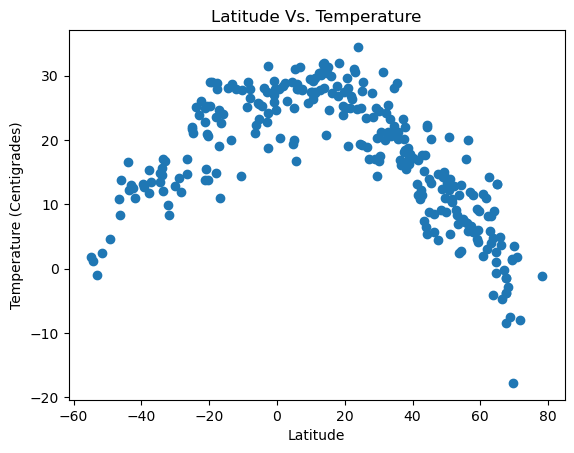

In [13]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.ylabel('Temperature (Centigrades)')
plt.xlabel('Latitude')
plt.title('Latitude Vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

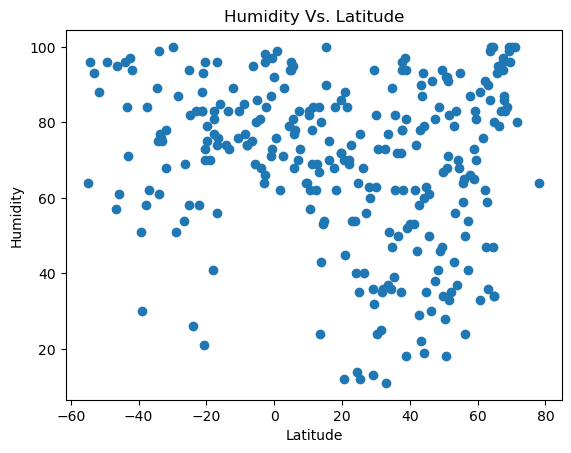

In [14]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Humidity Vs. Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

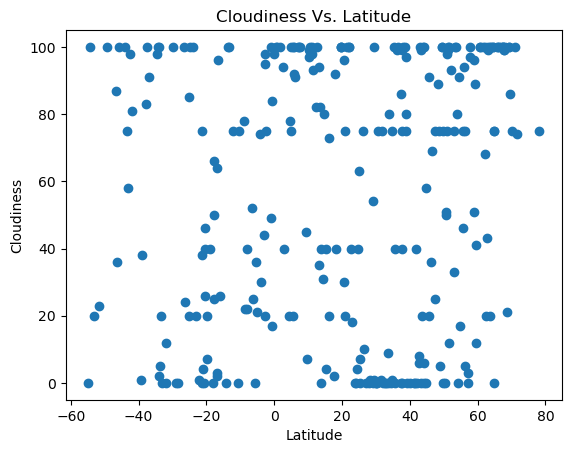

In [15]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Cloudiness Vs. Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

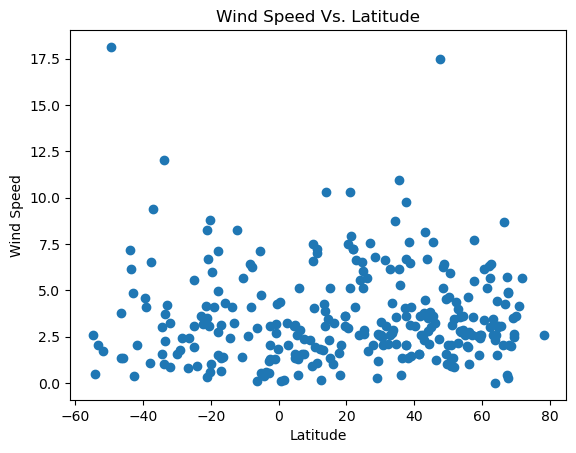

In [16]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Wind Speed Vs. Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def linear(x_axis, y_axis):
    slope,intercept,rvalue,pvalue,stderr =linregress(x_axis,y_axis)
    # Back to our regression model
    line_eq = f'y = {round(intercept,2)} + {round(slope,2)} X'
    y_predict = intercept + (slope * x_axis)
    return line_eq, y_predict

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem = city_data_df['Lat']>=0
northern_hem_df = city_data_df[northern_hem]

# Display sample data
northern_hem_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,warwick,41.7001,-71.4162,11.42,74,40,3.60,US,1683682140
3,margate,51.3813,1.3862,10.73,91,99,1.34,GB,1683682213
4,tiksi,71.6872,128.8694,-7.95,80,74,5.64,RU,1683682213
5,vorkuta,67.5000,64.0000,-3.83,96,100,0.42,RU,1683682213
6,albany,42.6001,-73.9662,12.23,58,6,2.57,US,1683682019


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem = city_data_df['Lat']<0
southern_hem_df = city_data_df[southern_hem]

# Display sample data
southern_hem_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,10.97,94,81,2.06,CL,1683682212
2,port elizabeth,-33.9180,25.5701,14.62,99,2,1.03,ZA,1683682213
9,papatowai,-46.5619,169.4708,10.90,57,87,3.78,NZ,1683682214
10,grytviken,-54.2811,-36.5092,1.26,96,100,0.48,GS,1683682214
12,blackmans bay,-43.0167,147.3167,13.07,71,58,4.85,AU,1683682215


###  Temperature vs. Latitude Linear Regression Plot

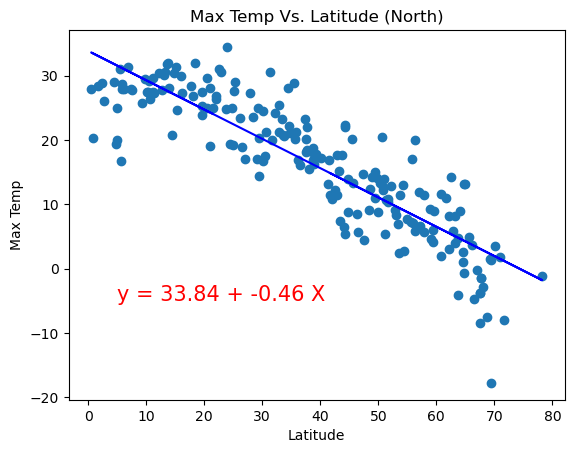

In [30]:
# Linear regression on Northern Hemisphere
x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Max Temp']
line_eq, y_predict = linear(x_axis, y_axis)
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Max Temp Vs. Latitude (North)')
plt.plot(x_axis, y_predict, color = "b")
plt.annotate(line_eq, (5,-5), color = 'r', fontsize = 15)

# Show plot
plt.show()

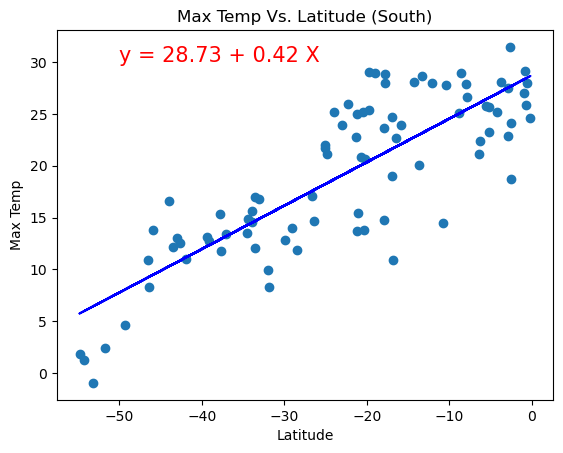

In [31]:
# Linear regression on Southern Hemisphere
x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Max Temp']
line_eq, y_predict = linear(x_axis, y_axis)
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Max Temp Vs. Latitude (South)')
plt.plot(x_axis, y_predict, color = "b")
plt.annotate(line_eq, (-50,30), color = 'r', fontsize = 15)

# Show plot
plt.show()

**Discussion about the linear relationship:** With the previous data, we can conclude that the more we approach the Equador, the temperatures start to rise 

### Humidity vs. Latitude Linear Regression Plot

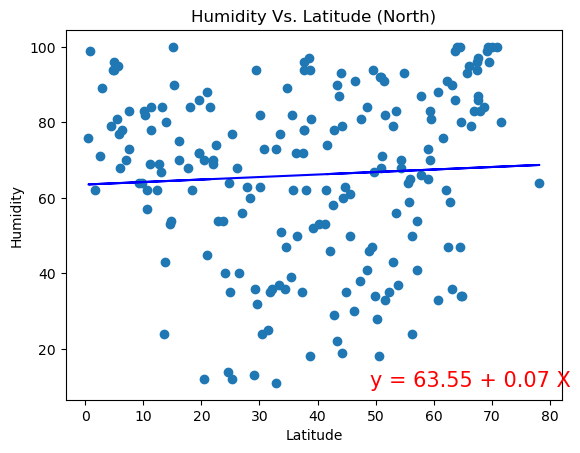

In [32]:
# Northern Hemisphere
x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Humidity']
line_eq, y_predict = linear(x_axis, y_axis)
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Humidity Vs. Latitude (North)')
plt.plot(x_axis, y_predict, color = "b")
plt.annotate(line_eq, (49,10), color = 'r', fontsize = 15)

# Show plot
plt.show()

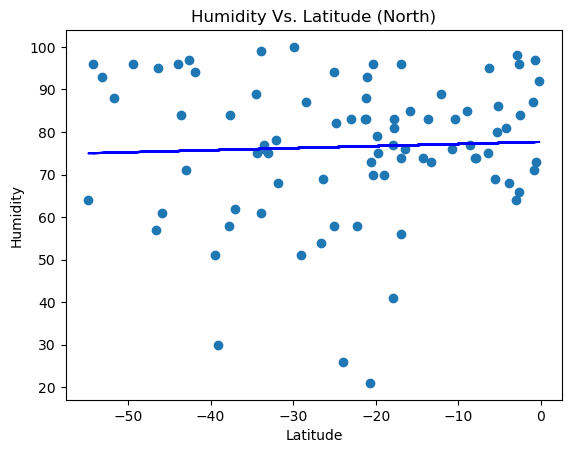

In [33]:
# Southern Hemisphere
x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Humidity']
line_eq, y_predict = linear(x_axis, y_axis)
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Humidity Vs. Latitude (North)')
plt.plot(x_axis, y_predict, color = "b")
plt.annotate(line_eq, (49,10), color = 'r', fontsize = 15)

# Show plot
plt.show()

**Discussion about the linear relationship:** We can observe that while there's higher humidity levels on the souther hemisphere, the northern hemisphere has more variance on the levels of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

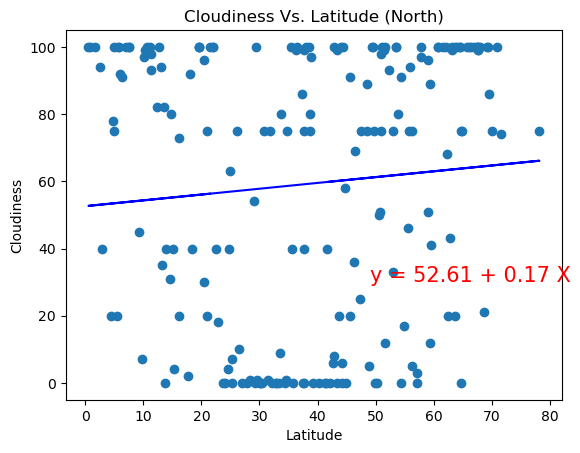

In [34]:
# Northern Hemisphere
x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Cloudiness']
line_eq, y_predict = linear(x_axis, y_axis)
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Cloudiness Vs. Latitude (North)')
plt.plot(x_axis, y_predict, color = "b")
plt.annotate(line_eq, (49,30), color = 'r', fontsize = 15)

# Show plot
plt.show()

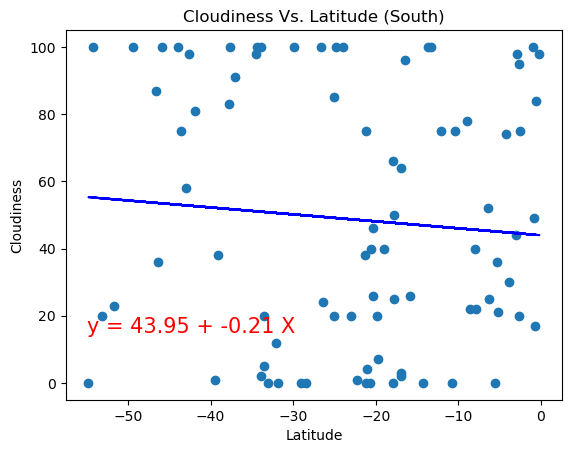

In [36]:
# Southern Hemisphere
x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Cloudiness']
line_eq, y_predict = linear(x_axis, y_axis)
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Cloudiness Vs. Latitude (South)')
plt.plot(x_axis, y_predict, color = "b")
plt.annotate(line_eq, (-55,15), color = 'r', fontsize = 15)


# Show plot
plt.show()

**Discussion about the linear relationship:** Even though the linear regression is very similar, we can observe that the Northern hemisphere has more clouds

### Wind Speed vs. Latitude Linear Regression Plot

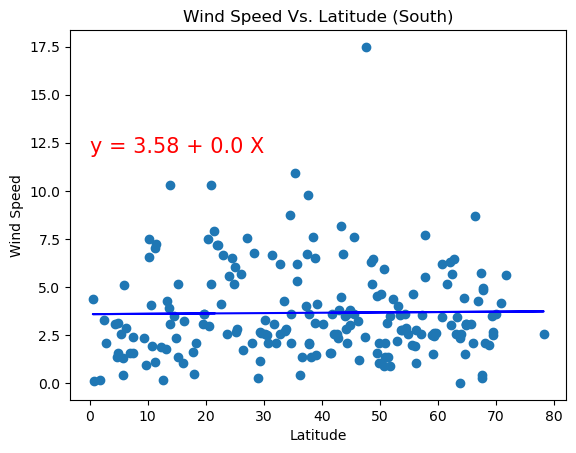

In [40]:
# Northern Hemisphere
x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Wind Speed']
line_eq, y_predict = linear(x_axis, y_axis)
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Wind Speed Vs. Latitude (South)')
plt.plot(x_axis, y_predict, color = "b")
plt.annotate(line_eq, (0,12), color = 'r', fontsize = 15)

# Show plot
plt.show()

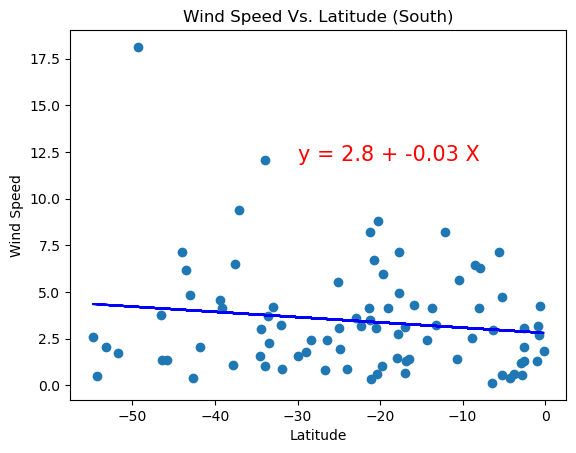

In [38]:
# Southern Hemisphere
x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Wind Speed']
line_eq, y_predict = linear(x_axis, y_axis)
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Wind Speed Vs. Latitude (South)')
plt.plot(x_axis, y_predict, color = "b")
plt.annotate(line_eq, (-30,12), color = 'r', fontsize = 15)

# Show plot
plt.show()

**Discussion about the linear relationship:** Overall, the wind speed is stable in both hemispheres, although it can be seen it increases the further you get from the Equator.